In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
import xgboost as xgb
%matplotlib inline
import pickle
from sklearn import model_selection
from scipy.stats import ttest_ind
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# loading data

df= pd.read_csv("C:\\Users\\iykeo\\OneDrive\\Desktop\\FINAL PROJECT\\Liver disease.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape

(583, 11)

In [5]:
# obtaining columns
list(df.columns)

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [6]:
# Rename the 'Dataset' column to 'LiverCondition'
df.rename(columns={'Dataset': 'LiverCondition'}, inplace=True)

In [7]:
# Rename the 'Alamine_Aminotransferase' column to 'Alanine_Aminotransferase'
df.rename(columns={'Alamine_Aminotransferase': 'Alanine_Aminotransferase'}, inplace=True)

In [8]:
# Verify the column name change
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,LiverCondition
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
# data types of each column
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alanine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
LiverCondition                  int64
dtype: object


In [10]:
# Summary Statistics
summary_stats = df.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alanine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
LiverCondition,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [11]:
# data info and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  LiverCondition              583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here is the observation from the dataset:
1) Only gender is non-numeric veriable. All others are numeric.
2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.

In [12]:
# Encode categorical variables (Gender column)
gender_mapping = {"Male": 1, "Female": 0}
df['Gender'] = df['Gender'].map(gender_mapping)

Handling missing values

In [13]:
# Check for missing values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
LiverCondition                0
dtype: int64

In [14]:
# Imputing missing values with the mean
df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.mean(), inplace=True)

In [15]:
# Confirming missing values has been hanled
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
LiverCondition                0
dtype: int64


Encoding the output feature 'Liver Condition' in a better way

In [16]:
#No liver disease then:=0 for patients having liver disease then:=1
df['LiverCondition'] = df['LiverCondition'].map({2:0,1:1})

In [17]:
#Verify changes
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,LiverCondition
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [18]:
# count the data in each category of liver condition (normal and diseased)
df.groupby('LiverCondition').count()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
LiverCondition,,,,,,,,,,
0,167,167,167,167,167,167,167,167,167,167
1,416,416,416,416,416,416,416,416,416,416


The above output shows we have data imbalance which would be addressed before training our models

Baseline Explorative Data Analysis

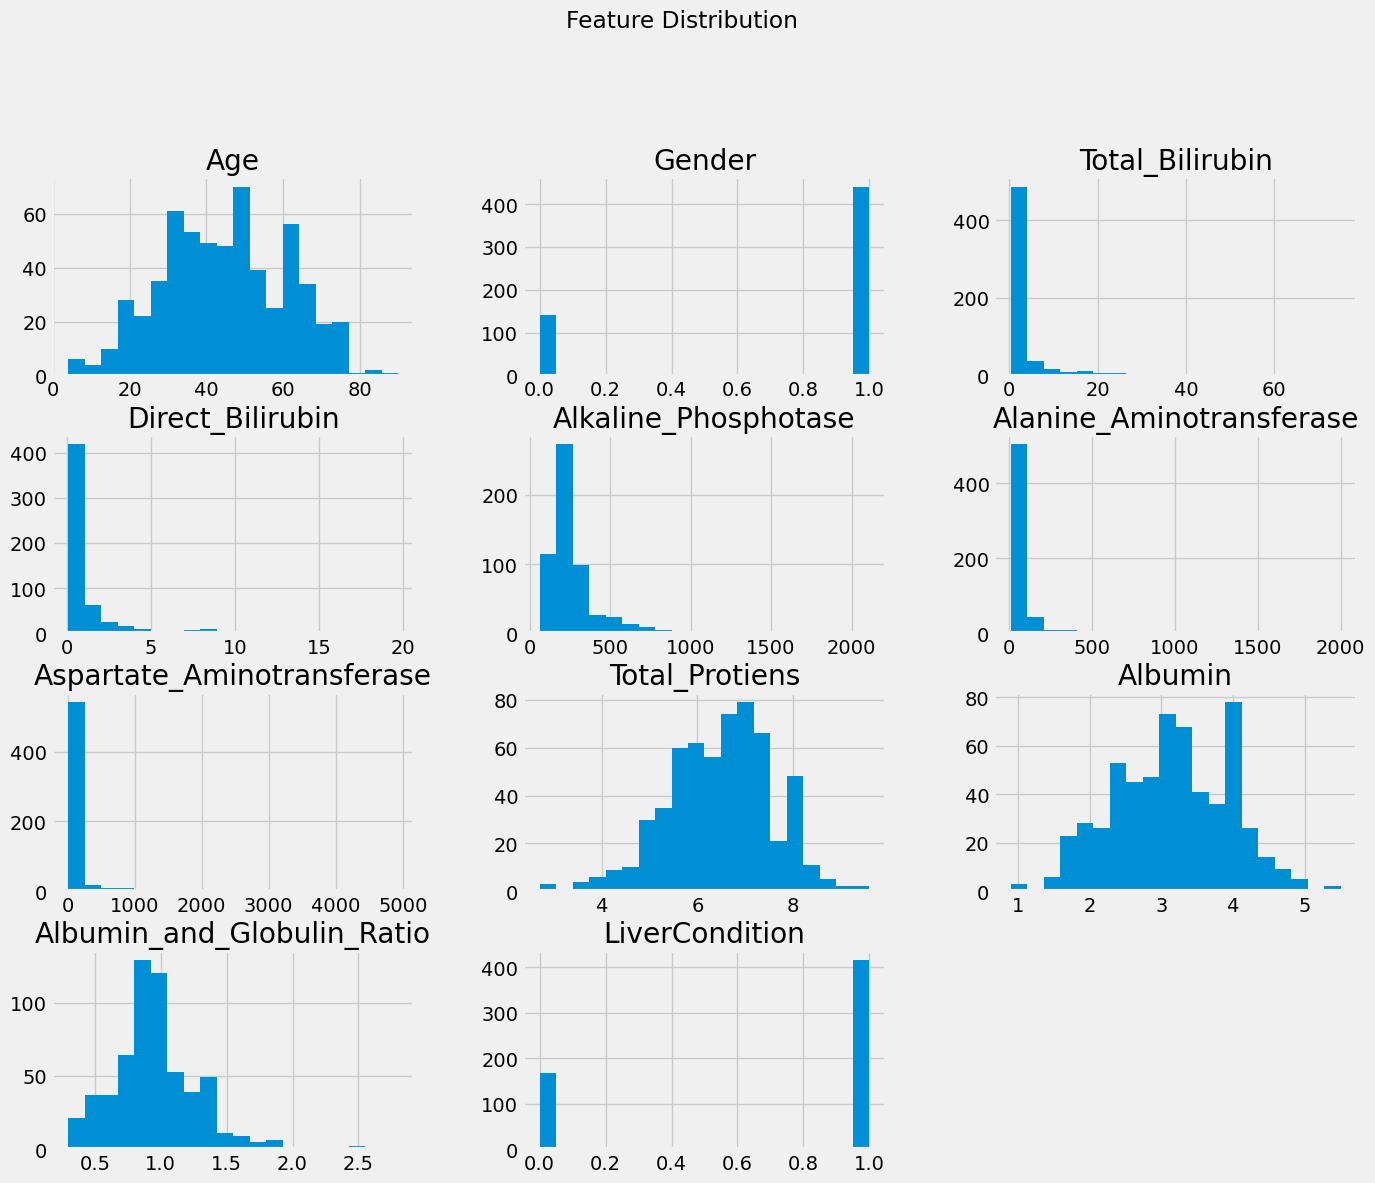

In [19]:
# Visualize distribution of each feature
df.hist(bins=20, figsize=(15, 12))
plt.suptitle("Feature Distribution", y=1.02)
plt.show()

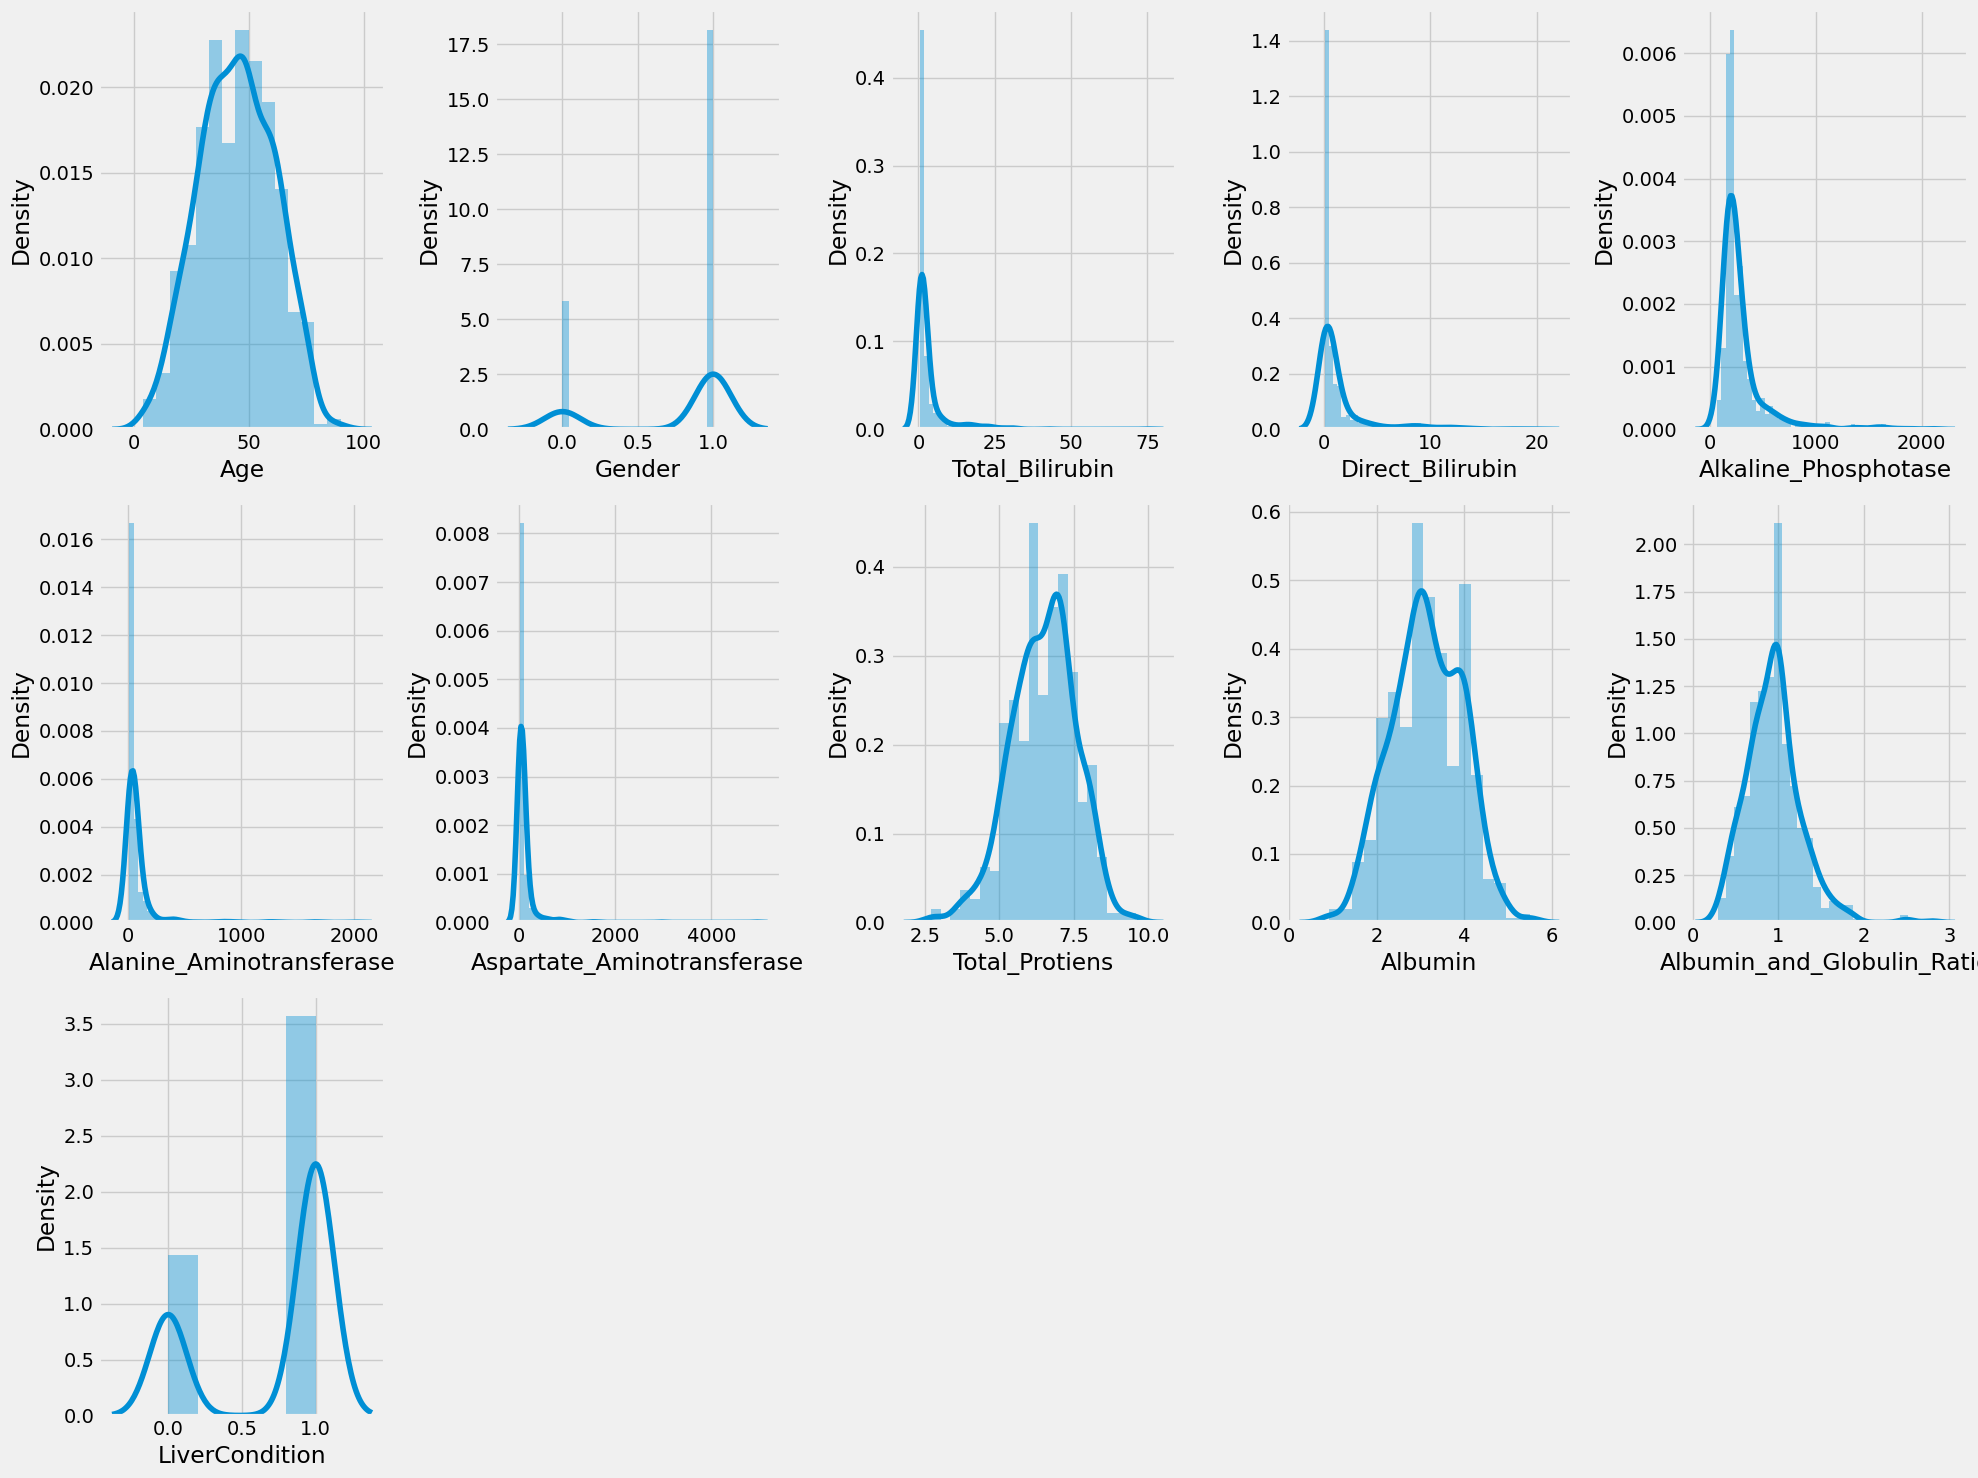

In [20]:
# still on the distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Some of the features have skewed distributions

Pairplot of all the features

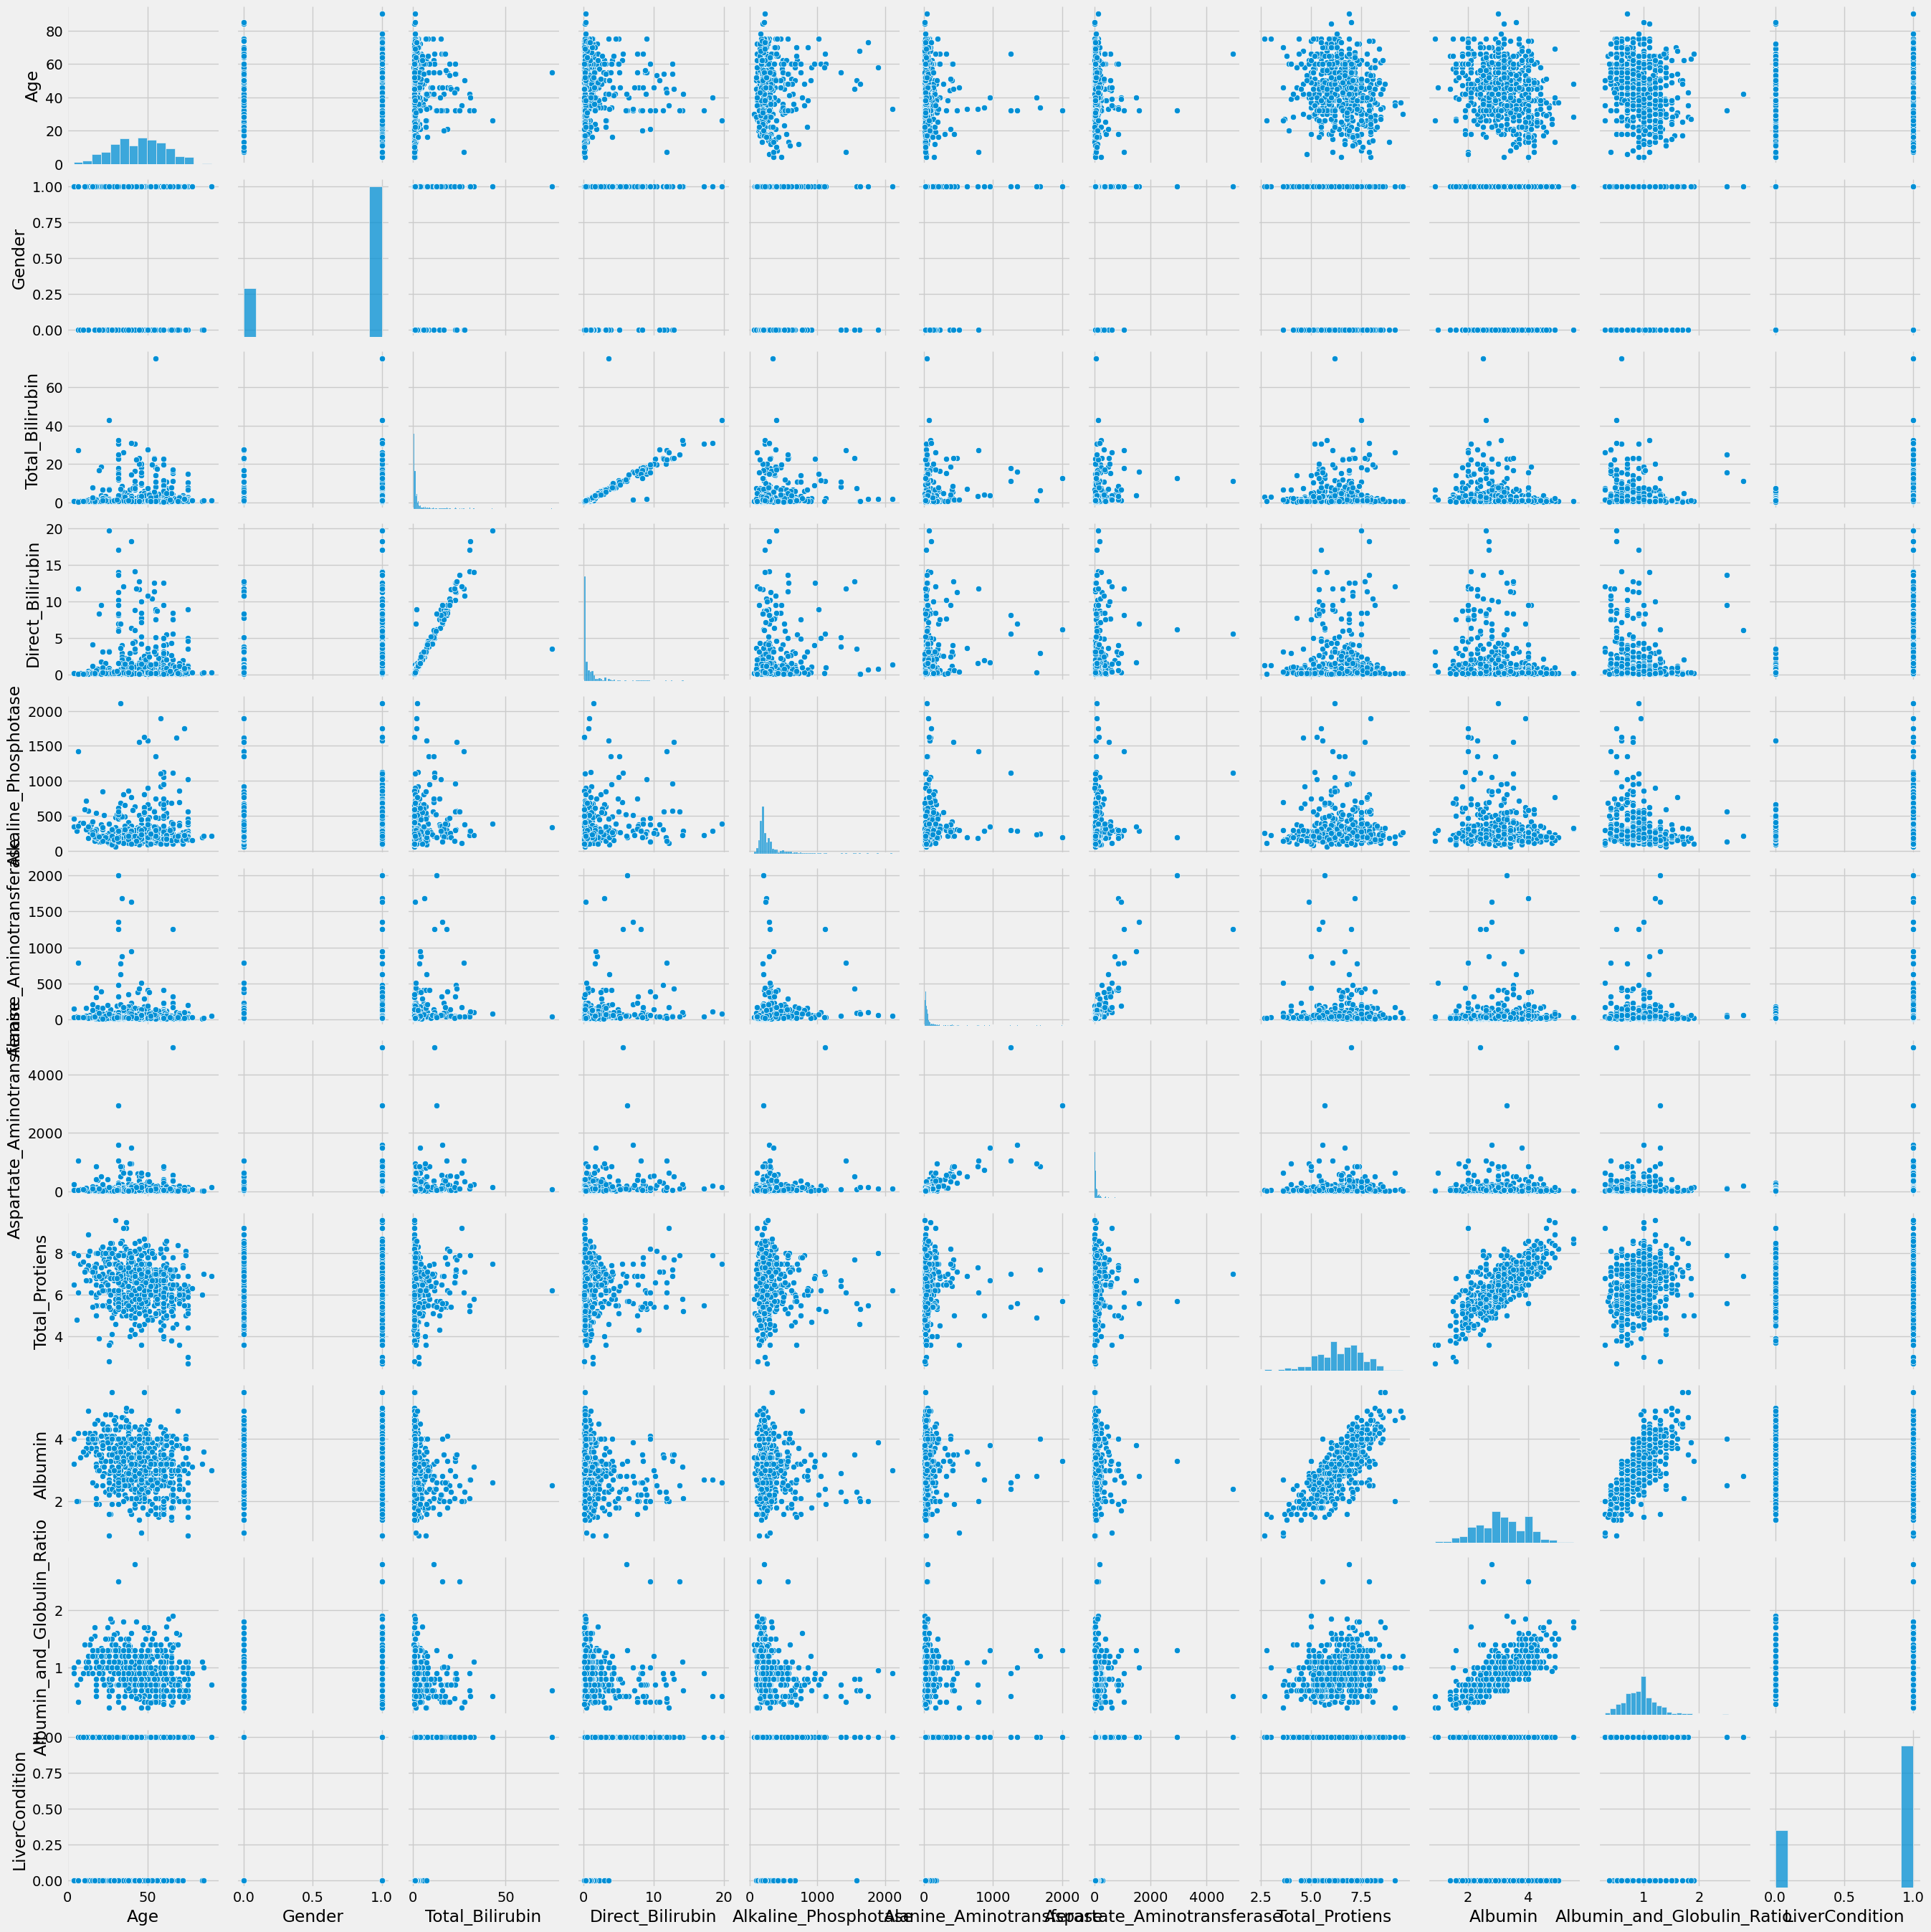

In [21]:
sns.pairplot(df)

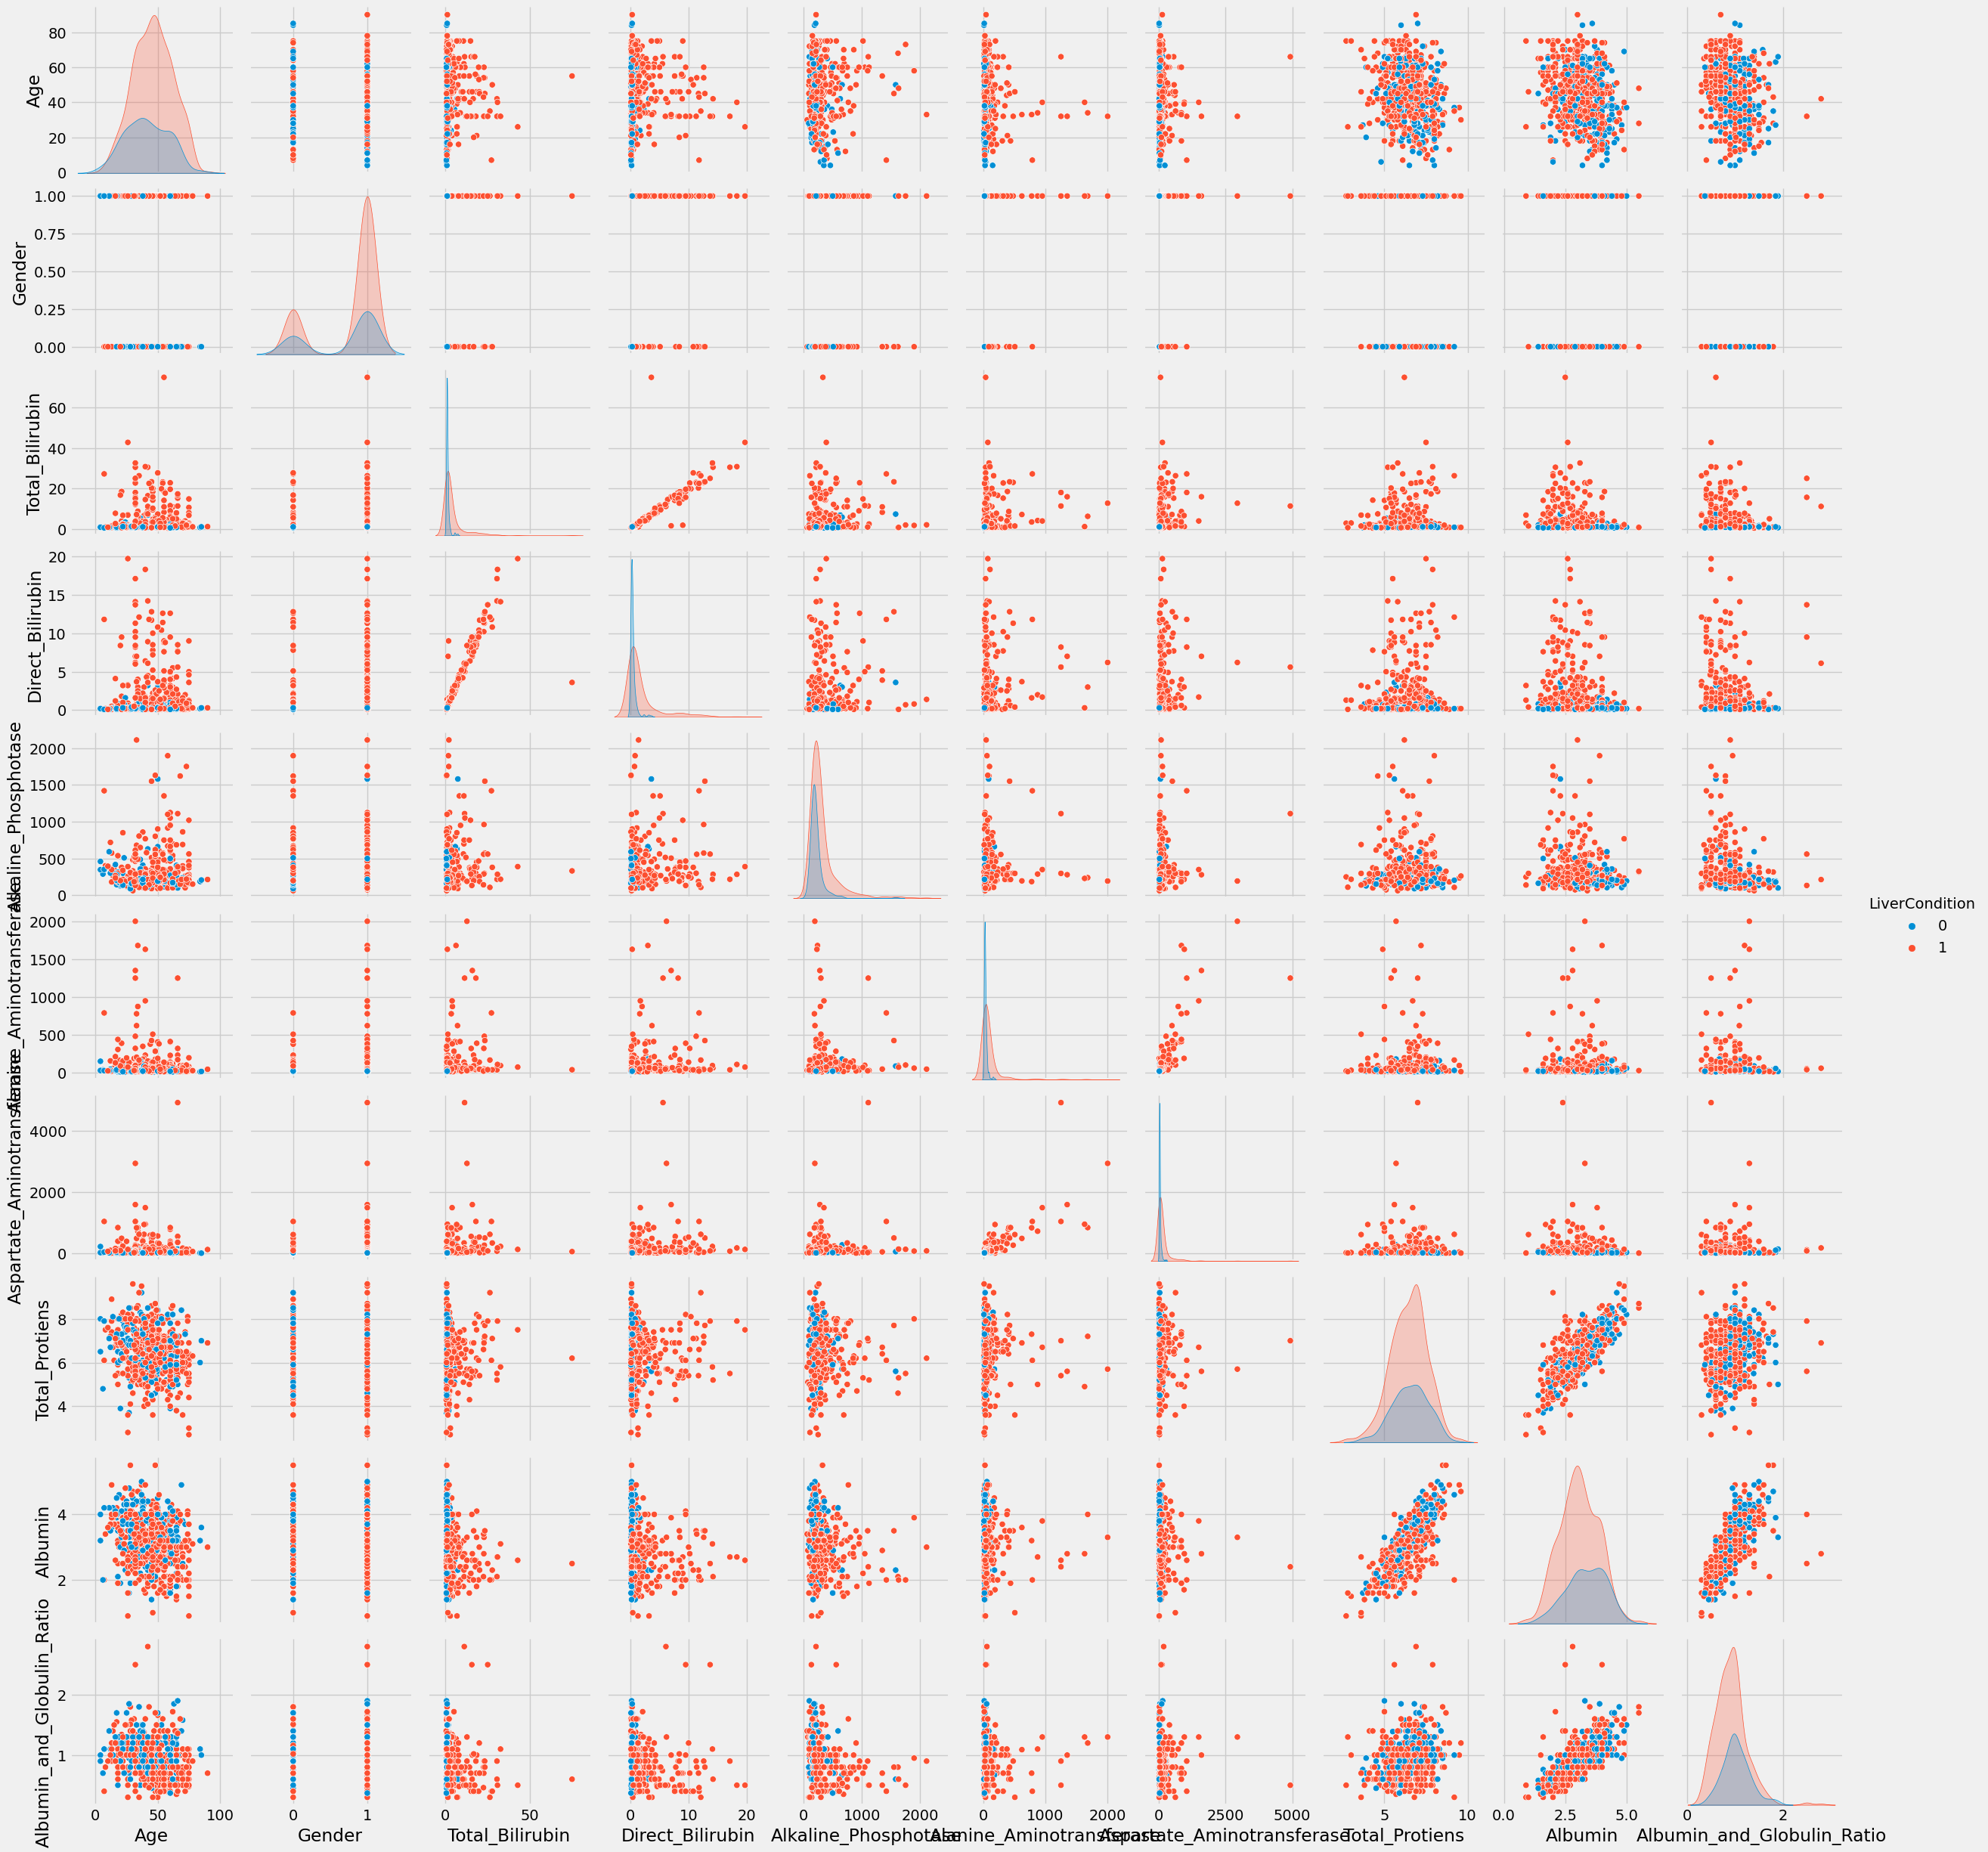

In [22]:
# How are the predictor variables related to the outcome variable?
sns.pairplot(df, hue="LiverCondition", diag_kind="kde")
plt.show()

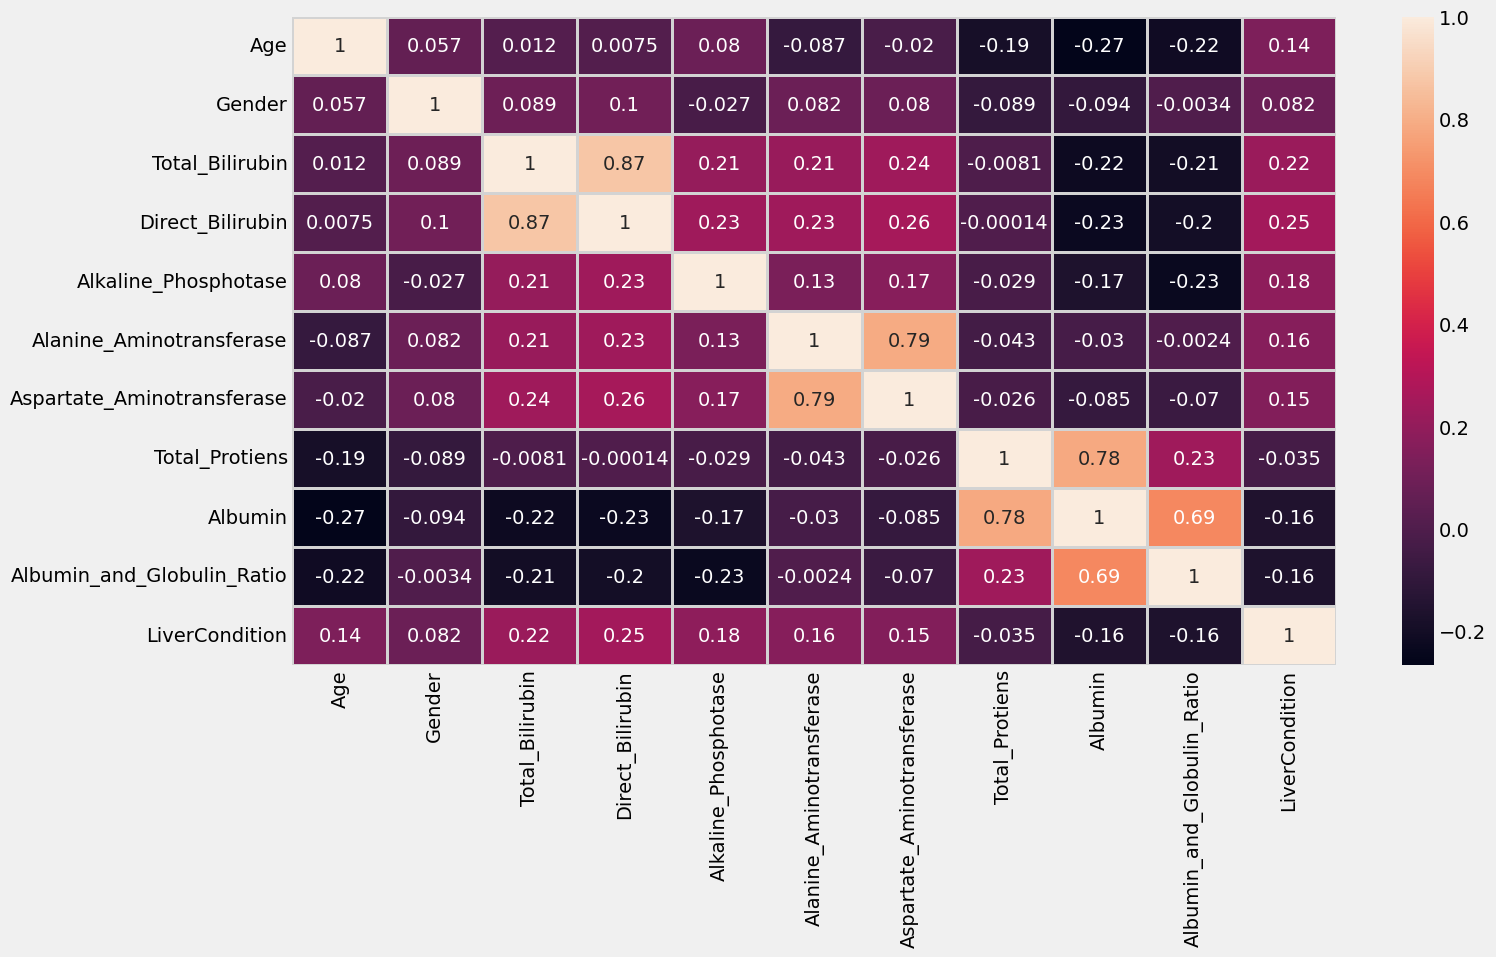

In [23]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

Analysing the categorical features

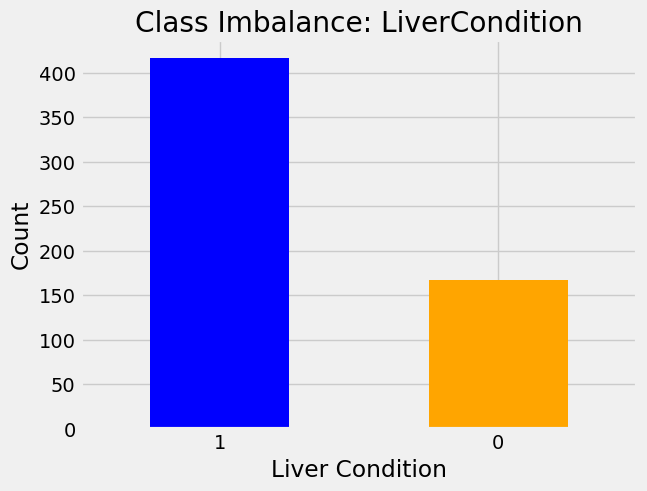

Number of patients diagnosed with liver disease:  416
Number of patients with normal liver :  167


In [24]:
# Investigate class imbalance
class_counts = df['LiverCondition'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Imbalance: LiverCondition")
plt.xlabel("Liver Condition")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

LD, NL = df['LiverCondition'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients with normal liver : ',NL)

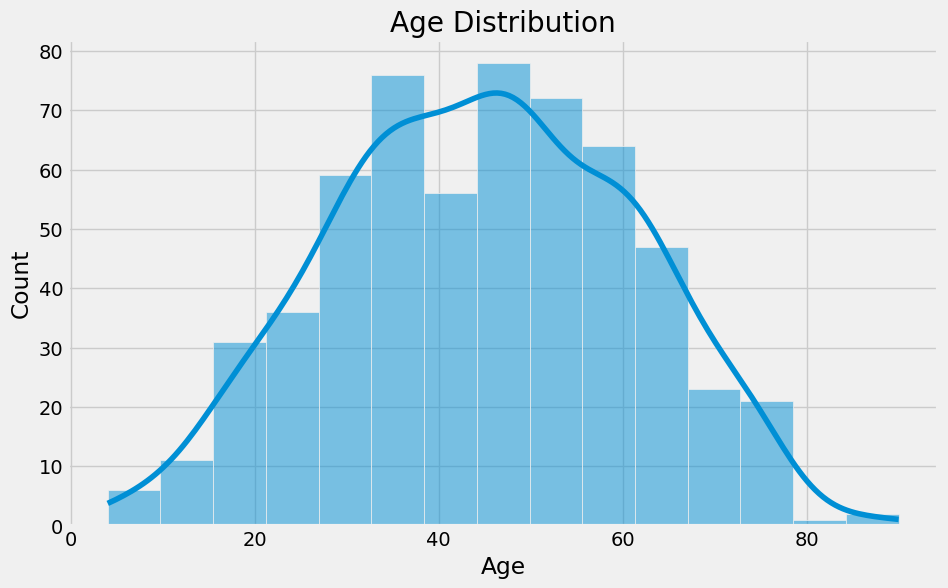

In [25]:
# Histograms and Density Plots
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", kde=True)
plt.title("Age Distribution")
plt.show()

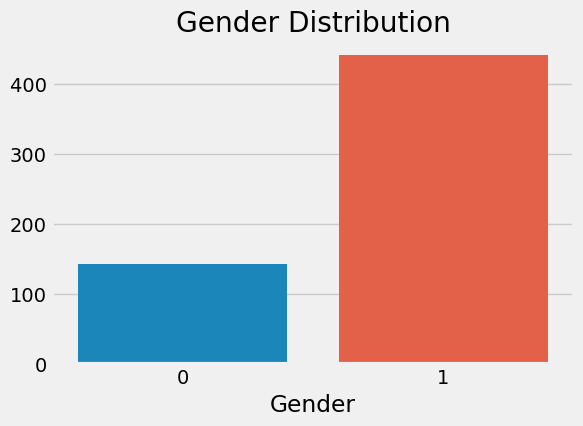

Number of patients that are male:  441
Number of patients that are female:  142


In [30]:
# Categorical Features
gender_distribution = df["Gender"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title("Gender Distribution")
plt.show()
M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [32]:
age_distribution = df.groupby(['LiverCondition', 'Gender'])['Age'].mean().reset_index()
age_distribution = age_distribution.rename(columns={'Age': 'Mean_Age'})

print(age_distribution)


   LiverCondition  Gender   Mean_Age
0               0       0  42.740000
1               0       1  40.598291
2               1       0  43.347826
3               1       1  46.950617


In [33]:
# Make a copy of the DataFrame
data = df.copy()

Identifying Significant Features and their relationship with liver condition

OLS linear Regression Model

In [34]:
# Separate features and target variable
X = df.drop('LiverCondition', axis=1)  # Features
y = df['LiverCondition']  # Target variable

X = sm.add_constant(X)
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         LiverCondition   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     7.812
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           8.38e-12
Time:                        17:13:07   Log-Likelihood:                -327.11
No. Observations:                 583   AIC:                             676.2
Df Residuals:                     572   BIC:                             724.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In summary, the model's R-squared value is relatively low, suggesting that the included features explain only a small portion of the variance in the target variable. Some coefficients have p-values indicating statistical significance, while others do not

Further analysis to identify significant features using a more complex model

In [35]:
# Feature Importance Analysis (using Random Forest as an example)
from sklearn.ensemble import RandomForestClassifier

In [36]:
X = df.drop(["LiverCondition"], axis=1)
y = df["LiverCondition"]

In [37]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

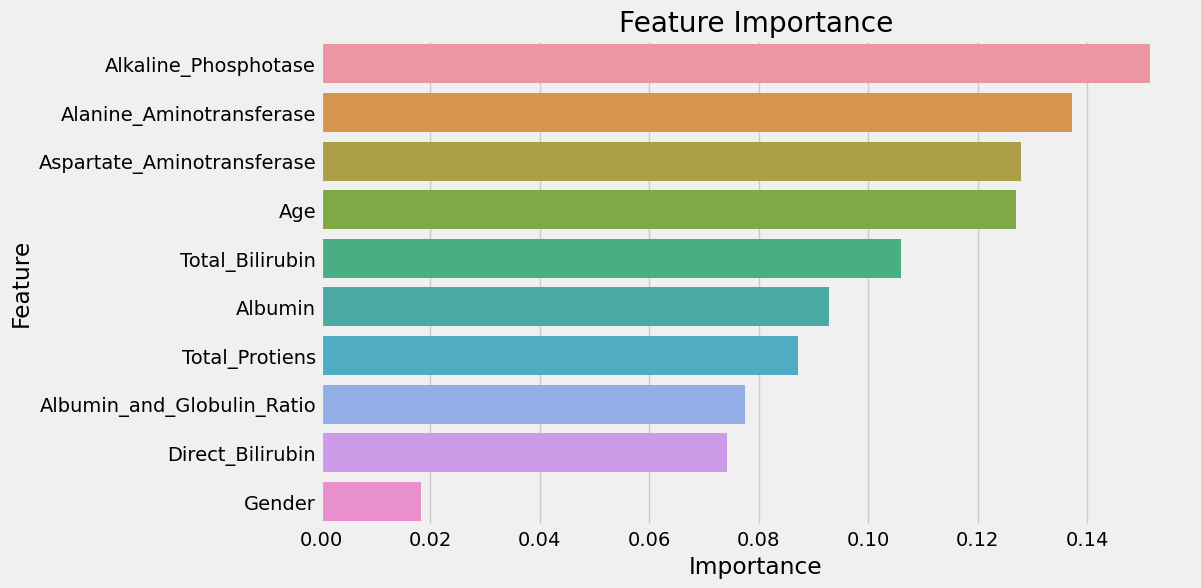

In [38]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

Higher scores indicate that the feature has a stronger influence on the model's predictions. These scores are calculated based on how often a feature is used to make decisions that result in correct predictions.